## **CLASSIFICATION MODELS**

Tigas Adrian Wahyuindrajati

DS0127

An assignment of Telkom Digital Incubator Program 2020

## **Exploratory Data Analysis**
### **Attribute Description**
##### **Input Variables**
###### A. Bank Client Data
```
1 - age: (numeric)

2 - job: type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital: marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education: (categorical: primary, secondary, tertiary and unknown)

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - balance: Balance of the individual.
```
###### B. Related with the Last Contact of the Current Campaign

```
9 - contact: contact communication type (categorical: 'cellular','telephone')

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

```

###### C. Other Attributes
```
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
```
##### **Output Variables (Class) / Desired Target**
```
17 - y (deposit) - has the client subscribed a term deposit? (binary: 'yes','no')
```

## **Dataset Information and Description:**
#### **Dataset Information**
*   Consist of 11,162 entries
*   Consist of 7 "numerical" attributes and 9 "categorical" attributes

*Note: The **duration** variable will be dropped*

In [122]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics



In [123]:
# import data to colab
df_deposit = pd.read_csv('https://raw.githubusercontent.com/tigasadrian/tugas_DTI/master/data/bank.csv', sep= ',')
df_deposit

# have a grasp of the data
df_deposit.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [124]:
# show the dataset information
df_deposit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [125]:
# check for missing value
df_deposit.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

#### **Descriptive Statistics of the Numerical Attributes**
*   Mean of **age** is approximately at 41 years old
*   Mean of **balance** is 1,528 with 3,225 of standard deviation (std), it means the **balance** is heavily distributed across the dataset

In [126]:
# show the descriptive statistics of the numerical attributes
df_deposit.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [127]:
# show the types of the categorical attributes
for col in df_deposit.select_dtypes(include='object').columns:
  print(col)
  print(df_deposit[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [128]:
# drop the duration variable
df_deposit.drop("duration", axis=1, inplace=True)

#### **Checking Class Balance**


*   Since the number of Class "yes" and "no" is well-balanced, the accuracy is not expected to be misleading



In [129]:
# checking class balance
df_deposit.deposit.value_counts()/df_deposit.deposit.count()

no     0.52616
yes    0.47384
Name: deposit, dtype: float64

### **Partitioning into Training and Testing Dataset**

*   Using StratifiedShuffleSplit for the partitioning
*   The proportion of training and testing dataset is 70:30



In [104]:
# preserve class proportion using StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=1) # the proportion is 70:30
for train_index, test_index in sss.split(df_deposit.drop("deposit", axis=1), df_deposit.deposit):
      traindf=df_deposit.loc[train_index]
      testdf=df_deposit.loc[test_index]

## **Data Preprocessing**

#### **Encode Categorical Variables**

In [133]:
# encoding target label
LE=LabelEncoder()
df_deposit['deposit']=LE.fit_transform(df_deposit.deposit.values)

# encoding categorical features
df_deposit=pd.get_dummies(df_deposit)

df_deposit

,age,balance,day,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,1,-1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,54,184,5,2,-1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,4,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
11159,32,29,19,2,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,2,172,5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [106]:
# partitioning again
for train_index, test_index in sss.split(df_deposit.drop("deposit", axis=1), df_deposit.deposit):
  traindf=df_deposit.loc[train_index]
  testdf=df_deposit.loc[test_index]

In [132]:
# partition x/y
xtrain=traindf.drop('deposit', axis=1)
ytrain=traindf.deposit

xtest=testdf.drop('deposit', axis=1)
ytest=testdf.deposit

ytest

304     1
5524    0
3033    1
3067    1
3155    1
       ..
5434    0
9922    0
2949    1
2297    1
2474    1
Name: deposit, Length: 3349, dtype: int64

## **Classification Models**

Using Naive-Bayes, K-Nearest Neighbors (KNN) and Gradient Boosting Classifier

### **Naive-Bayes**

#### **Modelling & Predicting**

In [108]:
# modelling Naive Bayes Classifier
gnb = GaussianNB()
#gnb_scores = cross_val_score(gnb, xtrain, ytrain, cv=3)
gnb.fit(xtrain,ytrain)

# predict to test data
y_pred_gnb = gnb.predict(xtest)

#### **Model Evaluation**

In [109]:
# show the confusion matrix
cm_gnb = metrics.confusion_matrix(ytest, y_pred_gnb)
cm_gnb

array([[1460,  302],
       [ 704,  883]])

In [131]:
# show the accuracy, precision, recall
acc_gnb = metrics.accuracy_score(ytest, y_pred_gnb)
prec_gnb = metrics.precision_score(ytest, y_pred_gnb)
rec_gnb = metrics.recall_score(ytest, y_pred_gnb)
f1_gnb = metrics.f1_score(ytest, y_pred_gnb)
kappa_gnb = metrics.cohen_kappa_score(ytest, y_pred_gnb)

print('Accuracy:', acc_gnb)
print('Precision:', prec_gnb)
print('Recall:', rec_gnb)
print('F1 Score:', f1_gnb)
print('Cohens Kappa Score:', kappa_gnb)

Accuracy: 0.6996118244252015
Precision: 0.7451476793248946
Recall: 0.5563957151858853
F1 Score: 0.6370851370851371
Cohens Kappa Score: 0.3899042381005672


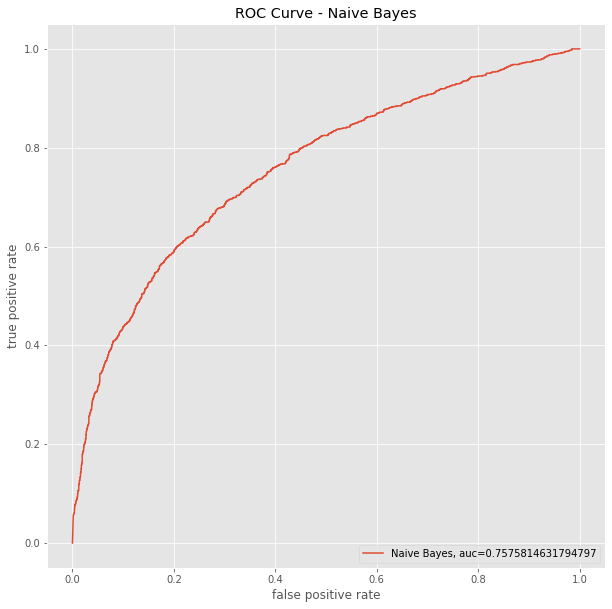

In [147]:
# personalize the visualization
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

# ROC Curve
y_pred_gnb_prob = gnb.predict_proba(xtest)[::,1]
fprgnb, tprgnb, _ = metrics.roc_curve(ytest,  y_pred_gnb_prob)
aucgnb = metrics.roc_auc_score(ytest, y_pred_gnb_prob)
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.title('ROC Curve - Naive Bayes')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

### **KNN**

#### **Modelling & Predicting**

In [112]:
# modeling
knn_clf = KNeighborsClassifier()
knn_clf.fit(xtrain, ytrain)

# predict to test data
y_pred_knn = knn_clf.predict(xtest)

#### **Model Evaluation**

In [113]:
# show the confusion matrix
cm_knn = metrics.confusion_matrix(ytest, y_pred_knn)
cm_knn

array([[1148,  614],
       [ 778,  809]])

In [114]:
# show the accuracy, precision, recall
acc_knn = metrics.accuracy_score(ytest, y_pred_knn)
prec_knn = metrics.precision_score(ytest, y_pred_knn)
rec_knn = metrics.recall_score(ytest, y_pred_knn)
f1_knn = metrics.f1_score(ytest, y_pred_knn)
kappa_knn = metrics.cohen_kappa_score(ytest, y_pred_knn)

print('Accuracy:', acc_knn)
print('Precision:', prec_knn)
print('Recall:', rec_knn)
print('F1 Score:', f1_knn)
print('Cohens Kappa Score:', kappa_knn)

Accuracy: 0.5843535383696626
Precision: 0.5685172171468728
Recall: 0.5097668557025835
F1 Score: 0.5375415282392026
Cohens Kappa Score: 0.16213122909735067


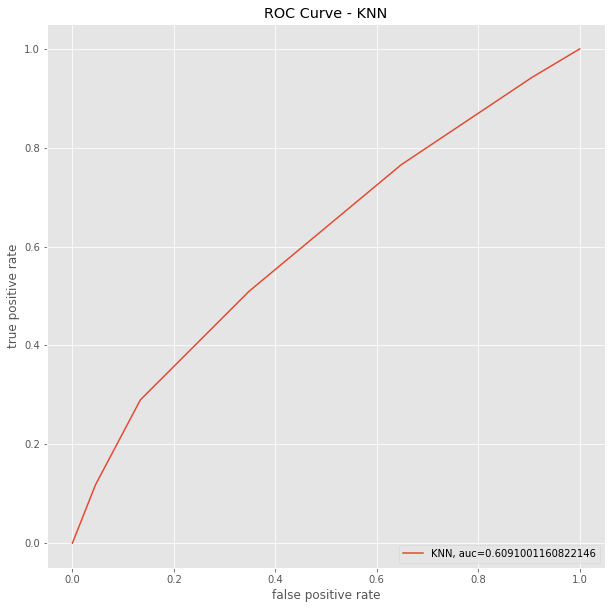

In [144]:
# personalize the visualization
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

# ROC Curve
y_pred_knn_prob = knn_clf.predict_proba(xtest)[::,1]
fprknn, tprknn, _ = metrics.roc_curve(ytest,  y_pred_knn_prob)
aucknn = metrics.roc_auc_score(ytest, y_pred_knn_prob)
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.title('ROC Curve - KNN')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

In [116]:
# pipeline combining transformers and estimator
#pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

# grid search to choose the best (combination of) hyperparameters
#gs_knn = GridSearchCV(estimator = pipe_knn,
 #                     param_grid = {'kneighborsclassifier__n_neighbors' : [4,5,6,7]},
  #                    scoring='accuracy',
   #                   cv=10)
# nested cross validation combining grid search (inner loop) and k-fold cv(outer loop)
#gs_knn_scores = cross_val_score(gs_knn, X=xtrain, y=ytrain, cv=5, scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
#gs_knn.fit(xtrain, ytrain)
#gs_knn_best = gs_knn.best_estimator_
#gs_knn_best.fit(xtrain, ytrain)

#print('Train Accuracy: {0:.1f}%'.format(gs_knn.score(xtrain, ytrain)*100))
#print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
#print('Test Accuracy: {0:.1f}%'.format(gs_knn.score(xtest,ytest)*100))

### **Gradient Boosting Classifier**

#### **Modelling & Predicting**

In [118]:
# modeling
grad_clf = GradientBoostingClassifier()
grad_clf.fit(xtrain, ytrain)

# predict to test data
y_pred_grad_clf = grad_clf.predict(xtest)

#### **Model Evaluation**

In [119]:
# show the confusion matrix
cm_grad = metrics.confusion_matrix(ytest, y_pred_grad_clf)
cm_grad

array([[1486,  276],
       [ 577, 1010]])

In [120]:
# show the accuracy, precision, recall
acc_grad = metrics.accuracy_score(ytest, y_pred_grad_clf)
prec_grad = metrics.precision_score(ytest, y_pred_grad_clf)
rec_grad = metrics.recall_score(ytest, y_pred_grad_clf)
f1_grad = metrics.f1_score(ytest, y_pred_grad_clf)
kappa_grad = metrics.cohen_kappa_score(ytest, y_pred_grad_clf)

print('Accuracy:', acc_grad)
print('Precision:', prec_grad)
print('Recall:', rec_grad)
print('F1 Score:', f1_grad)
print('Cohens Kappa Score:', kappa_grad)

Accuracy: 0.7452971036130188
Precision: 0.7853810264385692
Recall: 0.6364209199747952
F1 Score: 0.7030978071702054
Cohens Kappa Score: 0.4843426241531229


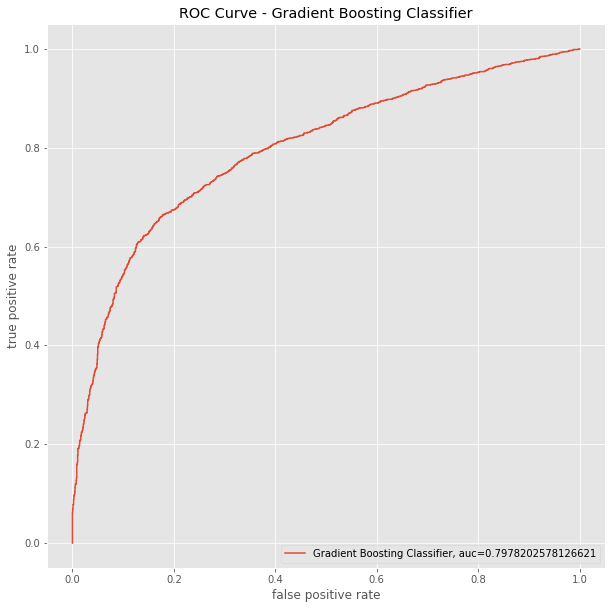

In [143]:
# personalize the visualization
plt.rcParams['figure.figsize'] = (10,10)
plt.style.use('ggplot')

# ROC Curve
y_pred_grad_prob = grad_clf.predict_proba(xtest)[::,1]
fprgrad, tprgrad, _ = metrics.roc_curve(ytest,  y_pred_grad_prob)
aucgrad = metrics.roc_auc_score(ytest, y_pred_grad_prob)
plt.plot(fprgrad,tprgrad,label="Gradient Boosting Classifier, auc="+str(aucgrad))
plt.title('ROC Curve - Gradient Boosting Classifier')
plt.xlabel('false positive rate') 
plt.ylabel('true positive rate')
plt.legend(loc=4)
plt.show()

## **Model Comparison**

The comparisons are based on model performance, ROC Curves, and prediction on the dataset

### **Comparing Model Performance**

In [140]:
# comparing model performance
print('Naive-Bayes Accuracy:', acc_gnb)
print('Naive-Bayes Precision:', prec_gnb)
print('Naive-Bayes Recall:', rec_gnb)
print('Naive-Bayes F1 Score:', f1_gnb)
print("---------------------------")
print('KKN Accuracy:', acc_knn)
print('KKN Precision:', prec_knn)
print('KKN Recall:', rec_knn)
print('KKN F1 Score:', f1_knn)
print("---------------------------")
print('Gradient Boosting Classifier Accuracy:', acc_grad)
print('Gradient Boosting Classifier Precision:', prec_grad)
print('Gradient Boosting Classifier Recall:', rec_grad)
print('Gradient Boosting Classifier F1 Score:', f1_grad)

Naive-Bayes Accuracy: 0.6996118244252015
Naive-Bayes Precision: 0.7451476793248946
Naive-Bayes Recall: 0.5563957151858853
Naive-Bayes F1 Score: 0.6370851370851371
---------------------------
KKN Accuracy: 0.5843535383696626
KKN Precision: 0.5685172171468728
KKN Recall: 0.5097668557025835
KKN F1 Score: 0.5375415282392026
---------------------------
Gradient Boosting Classifier Accuracy: 0.7452971036130188
Gradient Boosting Classifier Precision: 0.7853810264385692
Gradient Boosting Classifier Recall: 0.6364209199747952
Gradient Boosting Classifier F1 Score: 0.7030978071702054


### **Comparing ROC Curves**

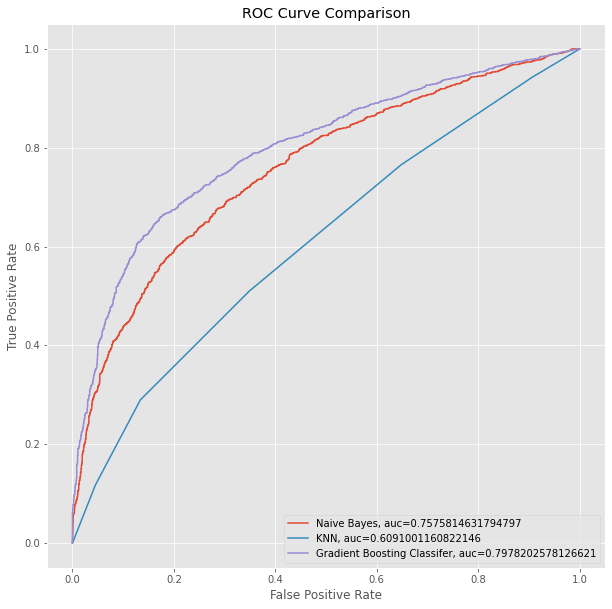

In [148]:
# Comparing ROC Curve
plt.plot(fprgnb,tprgnb,label="Naive Bayes, auc="+str(aucgnb))
plt.plot(fprknn,tprknn,label="KNN, auc="+str(aucknn))
plt.plot(fprgrad,tprgrad,label="Gradient Boosting Classifer, auc="+str(aucgrad))
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

### **Comparison Based on Prediction**

In [150]:
# Create Datafame Contains Fature and Result of prediction
df_compare = xtest.copy()
df_compare['ActualClass'] = ytest
df_compare['NaiveBayes'] = y_pred_gnb
df_compare['KNN'] = y_pred_knn
df_compare['Gradient Boosting Classifier'] = y_pred_grad_clf
df_compare.head()

,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,ActualClass,NaiveBayes,KNN,Gradient Boosting Classifier
304,46,536,16,2,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0
5524,25,148,23,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1
3033,68,1443,21,2,257,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
3067,87,2190,12,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
3155,35,415,4,1,176,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1


## **Conclusion**

**Gradient Boosting Classifier** is the best model out of 3 based on Accuracy, Precision, Recall, F1 Score, and ROC Curve

## **References**
1. https://www.kaggle.com/janiobachmann/bank-marketing-campaign-opening-a-term-deposit

2. https://www.kaggle.com/goldens/classification-review-with-python

3. https://colab.research.google.com/github/rc-dbe/dti/blob/main/002_classification.ipynb#scrollTo=XBpuFXsXxoOW